In [1]:
from fastai.vision.all import *
from fastai.vision import models
from fastai.metrics import error_rate
import pandas as pd
import numpy as np

/usr/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
path = 'data'

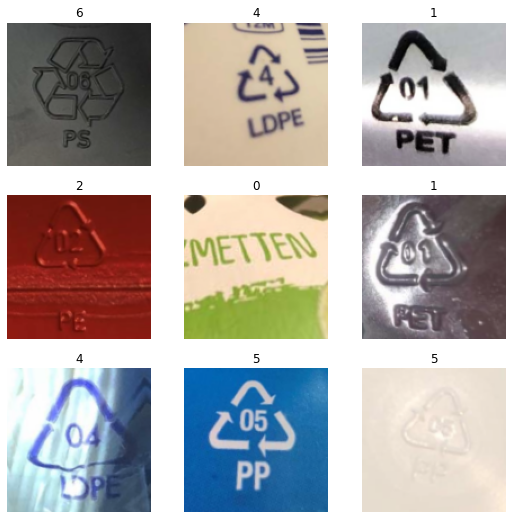

In [3]:
np.random.seed(42)
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(128), batch_tfms=aug_transforms(do_flip=False))
dls.show_batch()

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=1.9054607491852948e-06)

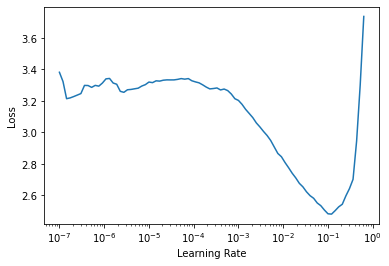

In [63]:
learn = cnn_learner(dls, models.alexnet, path=path, metrics=error_rate)
learn.lr_find()

In [64]:
learn.fit_one_cycle(20, max_lr=slice(1e-3, 1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,3.261267,2.565824,0.824818,00:02
1,3.216398,2.216570,0.781022,00:02
2,3.077760,1.853518,0.671533,00:02
3,2.889563,1.659219,0.620438,00:02
4,2.651734,1.455465,0.510949,00:02
5,2.436127,1.335425,0.474453,00:02
6,2.236357,1.294549,0.467153,00:02
7,2.078559,1.249027,0.437956,00:02
8,1.954581,1.240725,0.445255,00:02
9,1.845536,1.180693,0.416058,00:03


SuggestedLRs(lr_min=0.002754228748381138, lr_steep=1.0964781722577754e-06)

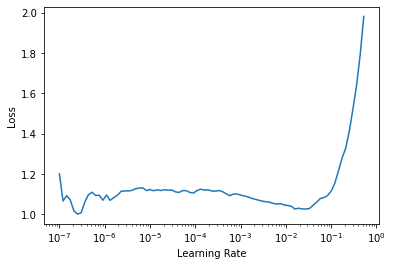

In [65]:
learn.lr_find()

In [66]:
learn.fit_one_cycle(40, max_lr=slice(1e-5, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.021058,1.149420,0.401460,00:02
1,0.990143,1.148163,0.401460,00:02
2,0.978597,1.139493,0.401460,00:02
3,0.986438,1.135509,0.401460,00:02
4,0.983528,1.129418,0.379562,00:02
5,0.982314,1.125536,0.394161,00:02
6,0.970657,1.127481,0.379562,00:03
7,0.956345,1.122639,0.408759,00:02
8,0.956760,1.106266,0.416058,00:02
9,0.945162,1.109089,0.386861,00:02


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=2.2908675418875646e-06)

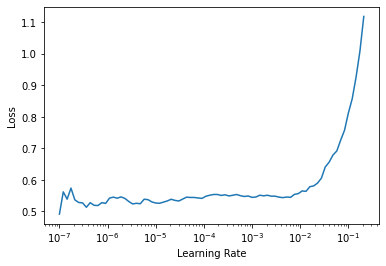

In [67]:
learn.lr_find()

In [68]:
learn.fit_one_cycle(40, max_lr=slice(1e-7, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.545069,1.094045,0.416058,00:02
1,0.557161,1.099179,0.430657,00:02
2,0.547419,1.091166,0.423358,00:02
3,0.566892,1.078978,0.423358,00:02
4,0.559147,1.070591,0.416058,00:02
5,0.563931,1.076549,0.394161,00:03
6,0.557394,1.065124,0.394161,00:03
7,0.553741,1.063507,0.364964,00:02
8,0.550479,1.076391,0.386861,00:03
9,0.546849,1.129140,0.386861,00:03


SuggestedLRs(lr_min=3.311311274956097e-07, lr_steep=9.12010818865383e-07)

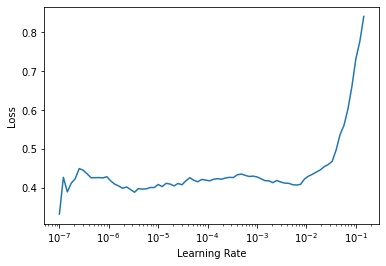

In [69]:
learn.lr_find()

In [70]:
learn.fit_one_cycle(40, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.399866,1.081098,0.379562,00:02
1,0.407631,1.070222,0.379562,00:02
2,0.385939,1.071026,0.364964,00:02
3,0.373150,1.078905,0.386861,00:02
4,0.379910,1.101088,0.408759,00:02
5,0.368081,1.094802,0.394161,00:02
6,0.366494,1.113704,0.386861,00:02
7,0.377165,1.127218,0.408759,00:02
8,0.387515,1.127319,0.379562,00:02
9,0.385527,1.132231,0.386861,00:02


SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=6.309573450380412e-07)

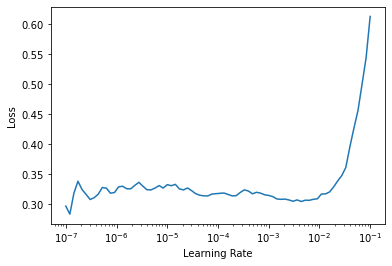

In [71]:
learn.lr_find()

In [72]:
learn.fit_one_cycle(20, max_lr=slice(1e-5, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.288113,1.127983,0.386861,00:02
1,0.272765,1.134707,0.394161,00:02
2,0.272724,1.122992,0.379562,00:02
3,0.287775,1.122098,0.394161,00:02
4,0.301389,1.116623,0.394161,00:02
5,0.302013,1.122562,0.386861,00:02
6,0.293430,1.137055,0.386861,00:02
7,0.293729,1.151016,0.379562,00:02
8,0.284358,1.140038,0.372263,00:02
9,0.288118,1.125669,0.364964,00:03


SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=7.585775847473997e-07)

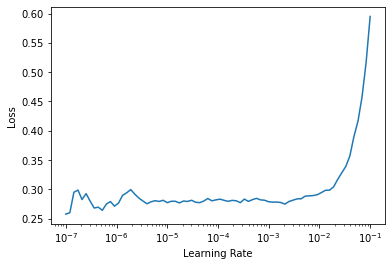

In [73]:
learn.lr_find()

In [74]:
learn.fit_one_cycle(20, max_lr=slice(1e-7, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.254126,1.112067,0.372263,00:02
1,0.239338,1.115509,0.386861,00:02
2,0.246305,1.113077,0.386861,00:02
3,0.256099,1.121371,0.394161,00:02
4,0.265468,1.122868,0.379562,00:02
5,0.273915,1.145432,0.423358,00:02
6,0.293922,1.198509,0.416058,00:02
7,0.294343,1.214016,0.423358,00:02
8,0.294045,1.198339,0.423358,00:03
9,0.288431,1.176840,0.350365,00:03


SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=7.585775847473997e-07)

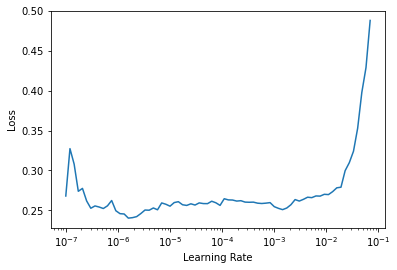

In [75]:
learn.lr_find()

In [76]:
learn.fit_one_cycle(10, max_lr=slice(1e-7, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.248748,1.139706,0.408759,00:02
1,0.256037,1.139152,0.386861,00:02
2,0.262528,1.142697,0.372263,00:02
3,0.260199,1.143888,0.379562,00:02
4,0.268628,1.194323,0.379562,00:02
5,0.258793,1.165914,0.394161,00:03
6,0.257692,1.140516,0.372263,00:02
7,0.257204,1.136579,0.372263,00:03
8,0.255732,1.144808,0.379562,00:02
9,0.256167,1.141393,0.379562,00:03


SuggestedLRs(lr_min=4.365158383734525e-06, lr_steep=2.75422871709452e-06)

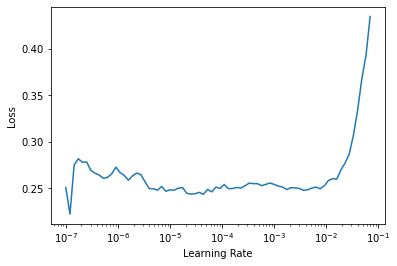

In [77]:
learn.lr_find()

In [78]:
learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.275295,1.137594,0.379562,00:02
1,0.270623,1.156215,0.364964,00:02
2,0.246844,1.144671,0.364964,00:02
3,0.252471,1.177789,0.364964,00:02
4,0.258404,1.165791,0.379562,00:02
5,0.252688,1.165965,0.379562,00:02
6,0.245916,1.165581,0.372263,00:02
7,0.250945,1.160009,0.386861,00:03
8,0.244892,1.164425,0.386861,00:02
9,0.240643,1.167408,0.379562,00:02


SuggestedLRs(lr_min=7.585775892948732e-06, lr_steep=6.309573450380412e-07)

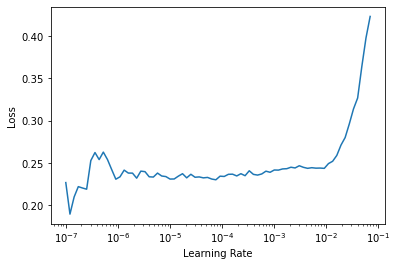

In [79]:
learn.lr_find()

In [80]:
learn.fine_tune(8, 2e-7)

epoch,train_loss,valid_loss,error_rate,time
0,0.243331,1.151735,0.386861,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.278266,1.151070,0.372263,00:04
1,0.247264,1.151677,0.372263,00:04
2,0.257430,1.154673,0.379562,00:04
3,0.257379,1.161459,0.372263,00:04
4,0.254507,1.161289,0.379562,00:04
5,0.248529,1.135468,0.379562,00:05
6,0.252415,1.138625,0.372263,00:05
7,0.250635,1.141171,0.372263,00:05


SuggestedLRs(lr_min=3.311311302240938e-05, lr_steep=7.585775847473997e-07)

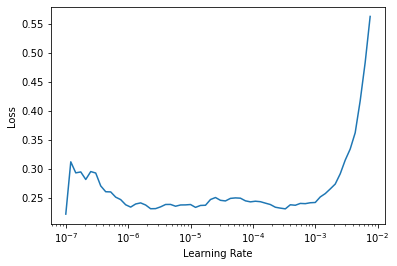

In [81]:
learn.lr_find()

SuggestedLRs(lr_min=0.00036307806149125097, lr_steep=7.585775847473997e-07)

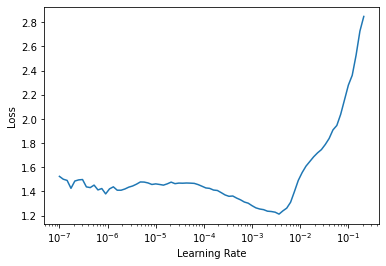

In [83]:
learn.lr_find()

In [84]:
learn.fit_one_cycle(20, max_lr=slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.465436,1.697462,0.445255,00:04
1,1.343529,1.406698,0.423358,00:04
2,1.200116,1.509674,0.416058,00:04
3,1.078942,1.719424,0.416058,00:04
4,0.979888,1.472839,0.357664,00:04
5,0.921385,1.555169,0.394161,00:05
6,0.849455,1.497269,0.372263,00:05
7,0.776361,1.320584,0.394161,00:05
8,0.729757,1.847160,0.416058,00:05
9,0.673088,1.400639,0.372263,00:05


SuggestedLRs(lr_min=3.6307807022240014e-06, lr_steep=9.12010818865383e-07)

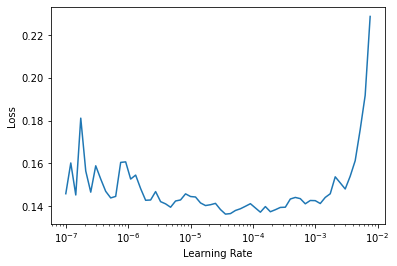

In [86]:
learn.lr_find()

In [87]:
learn.fit_one_cycle(5, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.122095,1.115806,0.299270,00:04
1,0.160884,1.270602,0.343066,00:04
2,0.202219,1.184820,0.350365,00:04
3,0.200078,1.234036,0.343066,00:04
4,0.192428,1.206608,0.299270,00:04


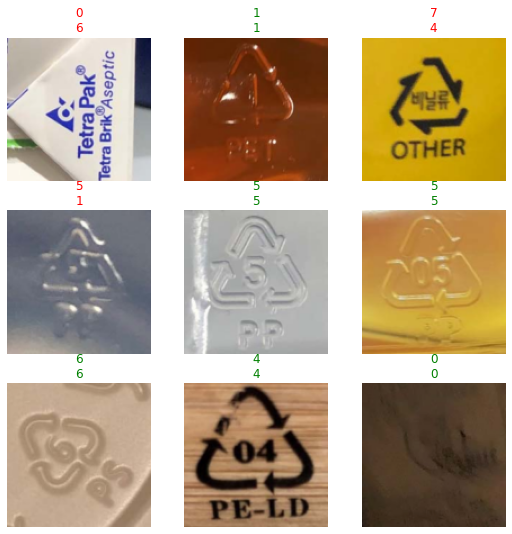

In [92]:
learn.show_results()

SuggestedLRs(lr_min=0.00010000000474974513, lr_steep=1.3182567499825382e-06)

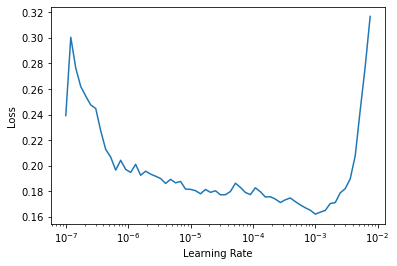

In [93]:
learn.lr_find()

In [94]:
learn.fine_tune(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.181065,1.162143,0.313869,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.150846,1.118216,0.321168,00:04
1,0.143189,1.128058,0.299270,00:04
2,0.148303,1.137882,0.291971,00:04


SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=1.9054607491852948e-06)

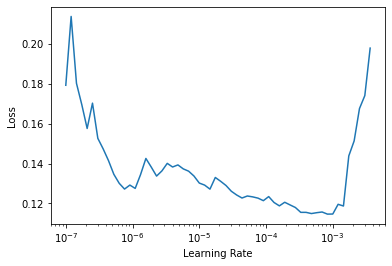

In [95]:
learn.lr_find()

In [96]:
learn.fine_tune(1, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.158511,1.123326,0.291971,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.139328,1.091664,0.291971,00:04


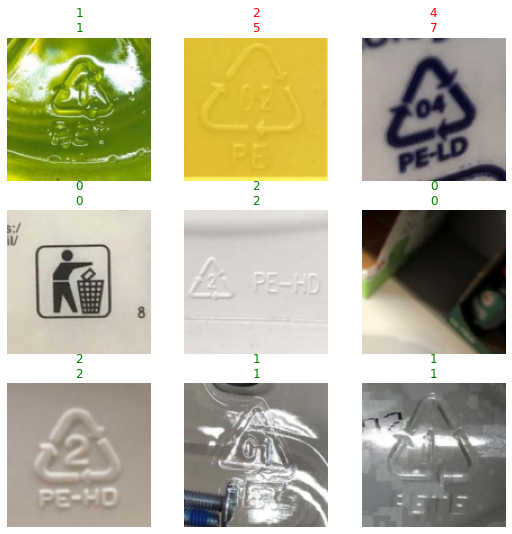

In [104]:
learn.show_results()

In [112]:
files = get_image_files('data/7')
learn.predict(files[6])

('7',
 TensorImage(7),
 TensorImage([1.6448e-06, 5.9054e-09, 2.5185e-07, 1.4201e-06, 3.3368e-06, 7.1867e-12,
         2.2367e-10, 9.9999e-01]))

In [ ]:
learn.save('')